train loss:12.798413111766763
=== epoch:1, train acc:0.162, test acc:0.176 ===
train loss:11.43539308000586
train loss:12.705032316446486
train loss:12.326274144075262
train loss:11.272959889186222
train loss:9.765623413543203
train loss:10.306457141180319
train loss:6.832869284941944
train loss:5.244199099339687
train loss:7.242259109217862
train loss:5.438986369299458
train loss:4.137562865242363
train loss:2.794500880528385
train loss:2.5799767994106735
train loss:2.3536692457953943
train loss:1.6685718416164794
train loss:1.9137765575178642
train loss:1.1715945907015095
train loss:1.119555330461952
train loss:1.2193780382426642
train loss:0.8679995233114998
train loss:0.929790766683876
train loss:0.7320713646454456
train loss:0.7815032409500047
train loss:0.6641842850911176
train loss:1.1552130411876158
train loss:0.5906794560449421
train loss:0.4765441136066535
train loss:0.695581508607235
train loss:0.4893240614534532
train loss:0.8075187331120647
train loss:0.6141546283730033
tr

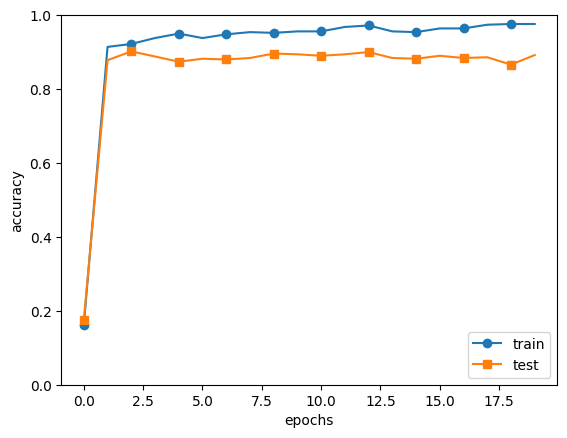

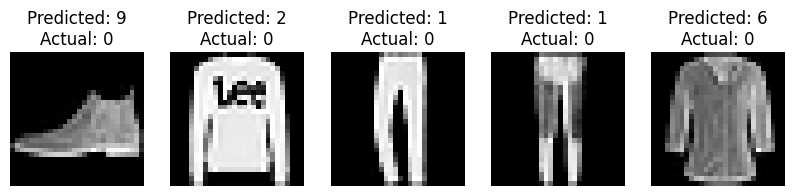

In [13]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer
from tensorflow import keras
from keras import layers

# 로그 파일 설정
log_file = 'accuracy_log5.txt'

if os.path.exists(log_file):
    os.remove(log_file)

with open(log_file, 'a') as f:
    f.write("Fashion MNIST 데이터셋을 로드합니다...\n")
    f.write("test 데이터를 로드했습니다.\n")

# 테스트 데이터셋에서 처음 몇 개의 이미지를 예측하여 출력
num_samples = 5

# 데이터 읽기
fashion_mnist = keras.datasets.fashion_mnist

x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:7000], t_test[:7000]

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

x_train = x_train.reshape(-1, 1, 28, 28).astype('float32')
x_test = x_test.reshape(-1, 1, 28, 28).astype('float32')


max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 100, 'filter_size': 3, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.04)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.003},
                  evaluate_sample_num_per_epoch=500)
trainer.train()


# 훈련 및 테스트 정확도 기록.
train_acc = trainer.train_acc_list[-1]  # 마지막 train accuracy
test_acc = trainer.test_acc_list[-1]    # 마지막 test accuracy
content = f"Epoch {max_epochs}: Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}"


# 로그 파일에 기록
with open(log_file, 'a') as f:
    f.write(content + '\n')


# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

predictions = network.predict(x_test)

# 처음 몇 개의 테스트 이미지에 대한 예측 결과 출력
plt.figure(figsize=(10, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}\nActual: {np.argmax(t_test[i])}')
    plt.axis('off')

plt.show()
